In [35]:
# импортируем данные для чтения и первичного анализа
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [36]:
# читаем файл
stud_math = pd.read_csv('stud_math.csv')

In [37]:
# установим дополнительные настройки
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [38]:
# смотрим, какие данные хранятся в файле и информацию о файле
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [39]:
# смотрим, какие униклальные значения встречаются в столбцах
for column in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob'
               , 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup'
               , 'paid', 'activities', 'nursery', 'studytime, granular', 'higher', 'internet'
               , 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']:
    print(column, ':', ' ', stud_math[column].unique())

school :   ['GP' 'MS']
sex :   ['F' 'M']
age :   [18 17 15 16 19 22 20 21]
address :   ['U' nan 'R']
famsize :   [nan 'GT3' 'LE3']
Pstatus :   ['A' nan 'T']
Medu :   [ 4.  1.  3.  2. nan  0.]
Fedu :   [ 4.  1.  2.  3. 40. nan  0.]
Mjob :   ['at_home' 'health' 'other' 'services' 'teacher' nan]
Fjob :   ['teacher' 'other' nan 'health' 'services' 'at_home']
reason :   ['course' 'other' 'home' 'reputation' nan]
guardian :   ['mother' 'father' 'other' nan]
traveltime :   [ 2.  1.  3. nan  4.]
studytime :   [ 2.  3.  1. nan  4.]
failures :   [ 0.  3. nan  2.  1.]
schoolsup :   ['yes' 'no' nan]
famsup :   ['no' 'yes' nan]
paid :   ['no' nan 'yes']
activities :   ['no' 'yes' nan]
nursery :   ['yes' 'no' nan]
studytime, granular :   [ -6.  -9.  -3.  nan -12.]
higher :   ['yes' nan 'no']
internet :   [nan 'yes' 'no']
romantic :   ['no' nan 'yes']
famrel :   [ 4.  5.  3. nan -1.  2.  1.]
freetime :   [ 3.  2.  4.  1.  5. nan]
goout :   [ 4.  3.  2.  1.  5. nan]
health :   [ 3.  5.  1.  2.  4. nan

In [40]:
# видим, что встречаются значения nan. Надо заменить их на None для удобства.

In [41]:
# В столбце famrel -1 заменим на None по здравому смыслу

In [42]:
# В столбце Fedu 40 заменить на None по здравому смыслу

In [43]:
# определим функцию первичной обработки данных. 
# Функция принимает на вход объекты Series и заменяет значения 'nan', '-1.0', '40.0' в Series на None
def fix_stud_math(x):
    if x == 'nan':
        return None
    if x == '-1.0':
        return None
    if x == '40.0':
        return None
    if x == ' ':
        return None
    if pd.isnull(x):
        return x
    return x

In [44]:
# проводим первичную обработку
for column in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob'
               , 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup'
               , 'paid', 'activities', 'nursery', 'studytime, granular', 'higher', 'internet'
               , 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']:
    stud_math[column] = stud_math[column].astype(str).apply(fix_stud_math)

In [45]:
# рассмотрим столбец 'studytime, granular'. 
# Судя по всему, в столбце указано детализированное время на учебу в школе.
# По здравому смылсу, эти значения не могут быть отрицательными, т.е. в столбце неверная информация
# и мы не будем использовать его для дальнейшего анализа

In [46]:
# смотрим, какие униклальные значения встречаются в столбцах после первичной обработки
for column in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob'
               , 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup'
               , 'paid', 'activities', 'nursery', 'studytime, granular', 'higher', 'internet'
               , 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']:
    print(column, ':', ' ', stud_math[column].unique())

school :   ['GP' 'MS']
sex :   ['F' 'M']
age :   ['18' '17' '15' '16' '19' '22' '20' '21']
address :   ['U' None 'R']
famsize :   [None 'GT3' 'LE3']
Pstatus :   ['A' None 'T']
Medu :   ['4.0' '1.0' '3.0' '2.0' None '0.0']
Fedu :   ['4.0' '1.0' '2.0' '3.0' None '0.0']
Mjob :   ['at_home' 'health' 'other' 'services' 'teacher' None]
Fjob :   ['teacher' 'other' None 'health' 'services' 'at_home']
reason :   ['course' 'other' 'home' 'reputation' None]
guardian :   ['mother' 'father' 'other' None]
traveltime :   ['2.0' '1.0' '3.0' None '4.0']
studytime :   ['2.0' '3.0' '1.0' None '4.0']
failures :   ['0.0' '3.0' None '2.0' '1.0']
schoolsup :   ['yes' 'no' None]
famsup :   ['no' 'yes' None]
paid :   ['no' None 'yes']
activities :   ['no' 'yes' None]
nursery :   ['yes' 'no' None]
studytime, granular :   ['-6.0' '-9.0' '-3.0' None '-12.0']
higher :   ['yes' None 'no']
internet :   [None 'yes' 'no']
romantic :   ['no' None 'yes']
famrel :   ['4.0' '5.0' '3.0' None '2.0' '1.0']
freetime :   ['3.0

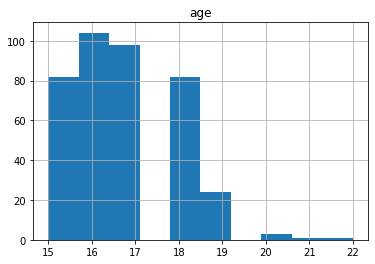

count     395
unique      8
top        16
freq      104
Name: age, dtype: object


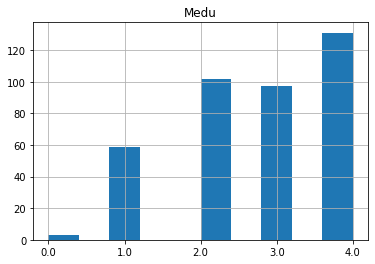

count     392
unique      5
top       4.0
freq      131
Name: Medu, dtype: object


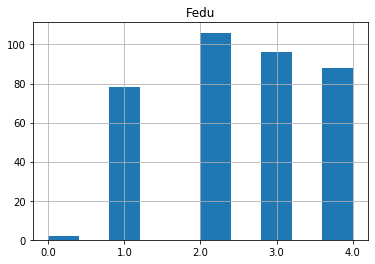

count     370
unique      5
top       2.0
freq      106
Name: Fedu, dtype: object


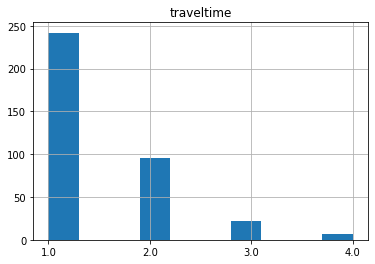

count     367
unique      4
top       1.0
freq      242
Name: traveltime, dtype: object


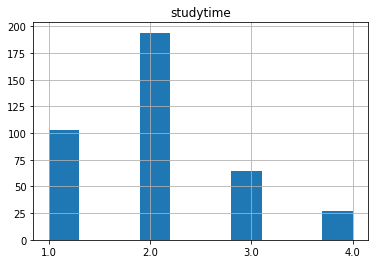

count     388
unique      4
top       2.0
freq      194
Name: studytime, dtype: object


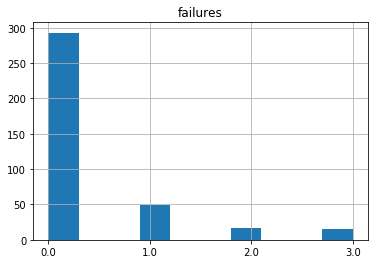

count     373
unique      4
top       0.0
freq      293
Name: failures, dtype: object


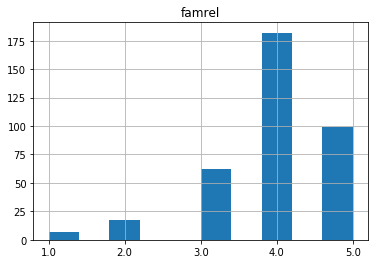

count     367
unique      5
top       4.0
freq      182
Name: famrel, dtype: object


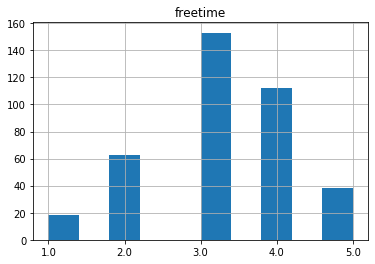

count     384
unique      5
top       3.0
freq      153
Name: freetime, dtype: object


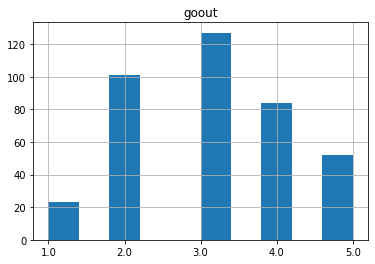

count     387
unique      5
top       3.0
freq      127
Name: goout, dtype: object


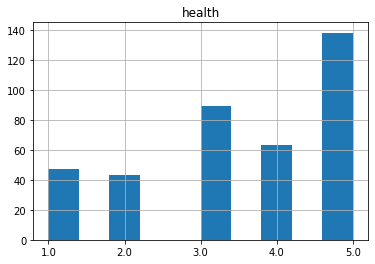

count     380
unique      5
top       5.0
freq      138
Name: health, dtype: object


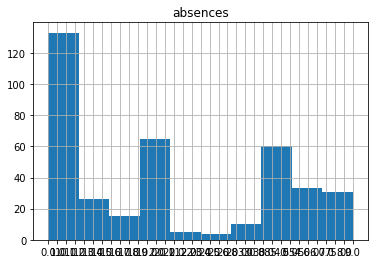

count     382
unique     35
top       0.0
freq      111
Name: absences, dtype: object


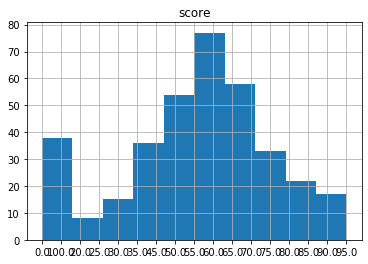

count      358
unique      17
top       50.0
freq        54
Name: score, dtype: object


In [47]:
# построим гистограммы для числовых столбцов
for column in ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel'
               , 'freetime', 'goout', 'health', 'absences', 'score']:
    plt.figure()
    stud_math[column].sort_values().hist()
    plt.title(column)
    plt.show()
    print(stud_math[column].describe())

In [48]:
# Анализируем гистограммы:
#    для столбца 'age' имеет тренд на снижение количества учащихся с ростом 'age'
    
#    для столбца 'Medu' имеет тренд на повышение количества учащихся с ростом 'Medu'
    
#    для столбца 'Fedu' имеет тренд на повышение количества учащихся с ростом 'Fedu'
#    до 'Fedu' == 2.0 с дальнейшим снижением
    
#    для столбца 'traveltime' имеет тренд на снижение количества учащихся с ростом 'traveltime'
    
#    для столбца 'studytime' имеет тренд на повышение количества учащихся с ростом 'studytime'
#    до 'studytime' == 2.0 с дальнейшим снижением
    
#    для столбца 'failures' имеет тренд на снижение количества учащихся с ростом 'failures'
    
#    для столбца 'famrel' имеет тренд на повышение количества учащихся с ростом 'famrel'
#    до 'famrel' == 4.0 с дальнейшим снижением
    
#    для столбца 'freetime' имеет тренд на повышение количества учащихся с ростом 'freetime'
#    до 'freetime' == 3.0 с дальнейшим снижением
    
#    для столбца 'goout' имеет тренд на повышение количества учащихся с ростом 'goout'
#    до 'goout' == 3.0 с дальнейшим снижением
    
#    для столбца 'health' имеет тренд на повышение количества учащихся с ростом 'health'
    
#    для столбца 'absences' имеются три ярковыраженных максимума
    
#    для столбца 'score' имеет тренд на повышение количества учащихся с ростом 'score'
#    до 'score' == 0.6 с дальнейшим снижением. также имеется ыраженный максимум при 'score' == 0

# для числовых столбцов видны потенциальные выбросы. необходимо проверить столбцы на наличие выбросов

Столбец age 
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0]. 



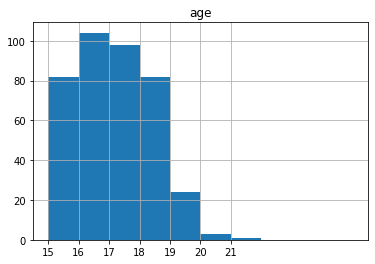

Столбец Medu 
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0]. 



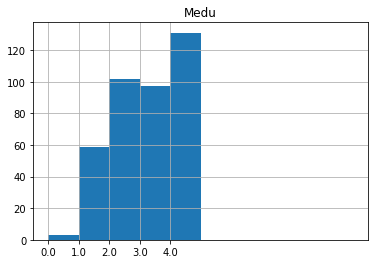

Столбец Fedu 
25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5]. 



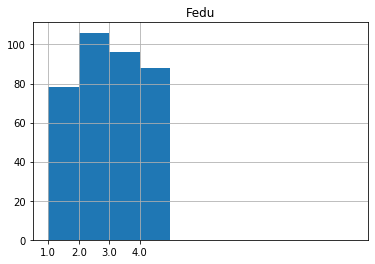

Столбец traveltime 
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5]. 



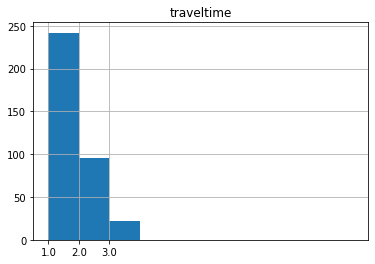

Столбец studytime 
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5]. 



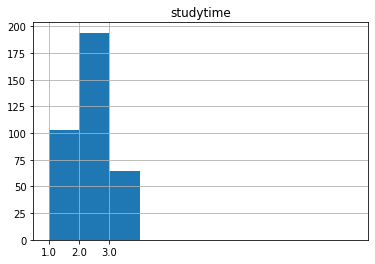

Столбец failures 
25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0]. 



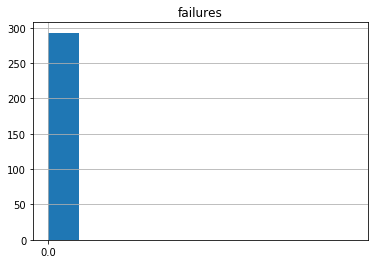

Столбец famrel 
25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5]. 



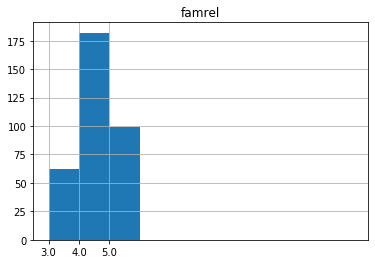

Столбец freetime 
25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5]. 



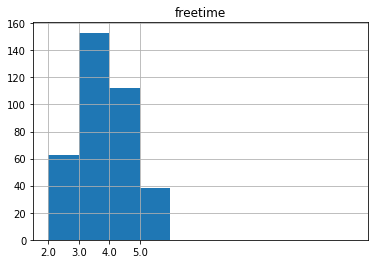

Столбец goout 
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0]. 



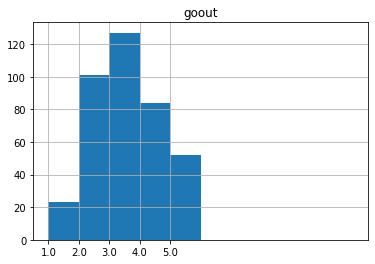

Столбец health 
25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0]. 



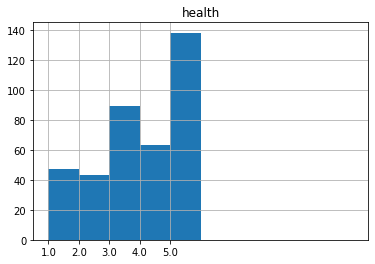

Столбец absences 
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0]. 



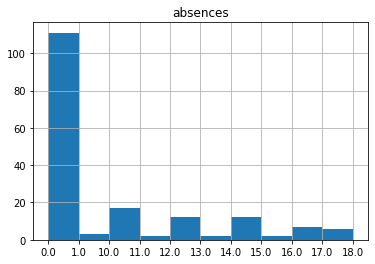

Столбец score 
25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5]. 



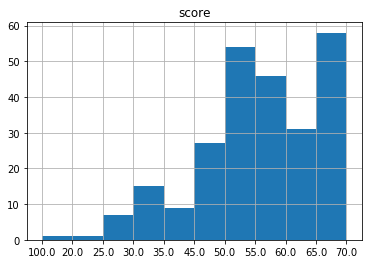

In [49]:
# ищем потенциальные выбросы для числовых столбцов
for column in ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel'
               , 'freetime', 'goout', 'health', 'absences', 'score']:  
    median = stud_math[column].astype(float).median()
    perc25 = stud_math[column].astype(float).quantile(0.25)
    perc75 = stud_math[column].astype(float).quantile(0.75)
    IQR = perc75 - perc25
    print('Столбец', column, '\n25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
          , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f = perc25 - 1.5 * IQR
                                                                           , l = perc75 + 1.5*IQR), '\n')
    
    
    plt.figure()
    stud_math[column].loc[stud_math[column].astype(float).between(perc25 - 1.5*IQR
                                    , perc75 + 1.5*IQR)].sort_values().hist(bins = 10
                                                                            , range = (0, 10)
                                                                            , label = 'IQR')
                                                                                                          
    plt.title(column)
    plt.show()

In [50]:
# Анализируем результаты поиска выбросов. Имеются выбросы для столбцов:
#    'age', но по смыслу имеющийся диапазон значений может встретиться. не будем исключать из него выбросы.
#    'Fedu', но по смыслу имеющийся диапазон значений может встретиться. не будем исключать из него выбросы.
#    'traveltime', но по смыслу имеющийся диапазон значений может встретиться. не будем исключать из него выбросы.
#    'studytime', но по смыслу имеющийся диапазон значений может встретиться. не будем исключать из него выбросы.
#    'failures', но по смыслу имеющийся диапазон значений может встретиться. не будем исключать из него выбросы.
#    'famrel', но по смыслу имеющийся диапазон значений может встретиться. не будем исключать из него выбросы.
#    'freetime', но по смыслу имеющийся диапазон значений может встретиться. не будем исключать из него выбросы.
#    'absences'. имеются значния, которые необходимо отбросить. будем исключать из него выбросы.
#    'score'. имеются значние 0 (ноль), которое необходимо отбросить по зравому смыслу.

In [51]:
# цикл писался, для нескольких числовых переменных, но по факту используется для одной
# отсеим имеющиеся выбросы для числовых столбцов 'absences'
for column in ['absences']:  
    perc25 = stud_math[column].astype(float).quantile(0.25)
    perc75 = stud_math[column].astype(float).quantile(0.75)
    IQR = perc75 - perc25
    stud_math = stud_math.loc[stud_math[column].astype(float).between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
    print('Столбец', column, ':\nпосле отсеиания выбросов осталось', stud_math[column].count()
          , 'записей\n')

Столбец absences :
после отсеиания выбросов осталось 366 записей



In [52]:
# отбросим для стобца 'score' значние 0 (ноль)
stud_math = stud_math.loc[stud_math['score'].astype(float) > 0]
print('Столбец', 'score', ':\nпосле отсеиания выбросов осталось', stud_math['score'].count()
          , 'записей\n')

Столбец score :
после отсеиания выбросов осталось 299 записей



In [53]:
# функция подсчета уникальных значений для номинативных переменных
def count (x):
    display(pd.DataFrame(x.value_counts()))
    print("Количество уникальных значений:", x.nunique())

In [54]:
for column in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob'
               , 'reason', 'guardian', 'schoolsup', 'famsup'
               , 'paid', 'activities', 'nursery', 'higher', 'internet'
               , 'romantic']:
    count(stud_math[column])

,school
GP,262
MS,37


Количество уникальных значений: 2


,sex
F,154
M,145


Количество уникальных значений: 2


,address
U,223
R,63


Количество уникальных значений: 2


,famsize
GT3,195
LE3,87


Количество уникальных значений: 2


,Pstatus
T,238
A,30


Количество уникальных значений: 2


,Mjob
other,97
services,73
teacher,45
at_home,43
health,27


Количество уникальных значений: 5


,Fjob
other,152
services,73
teacher,22
at_home,13
health,12


Количество уникальных значений: 5


,reason
course,102
reputation,83
home,71
other,28


Количество уникальных значений: 4


,guardian
mother,189
father,70
other,13


Количество уникальных значений: 3


,schoolsup
no,251
yes,39


Количество уникальных значений: 2


,famsup
yes,165
no,103


Количество уникальных значений: 2


,paid
no,152
yes,117


Количество уникальных значений: 2


,activities
yes,152
no,136


Количество уникальных значений: 2


,nursery
yes,232
no,56


Количество уникальных значений: 2


,higher
yes,274
no,9


Количество уникальных значений: 2


,internet
yes,228
no,46


Количество уникальных значений: 2


,romantic
no,188
yes,86


Количество уникальных значений: 2


In [55]:
# рассмотрим корреляции для числовых столбцов
new_stud_math = stud_math[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel'
               , 'freetime', 'goout', 'health', 'absences', 'score']].copy()

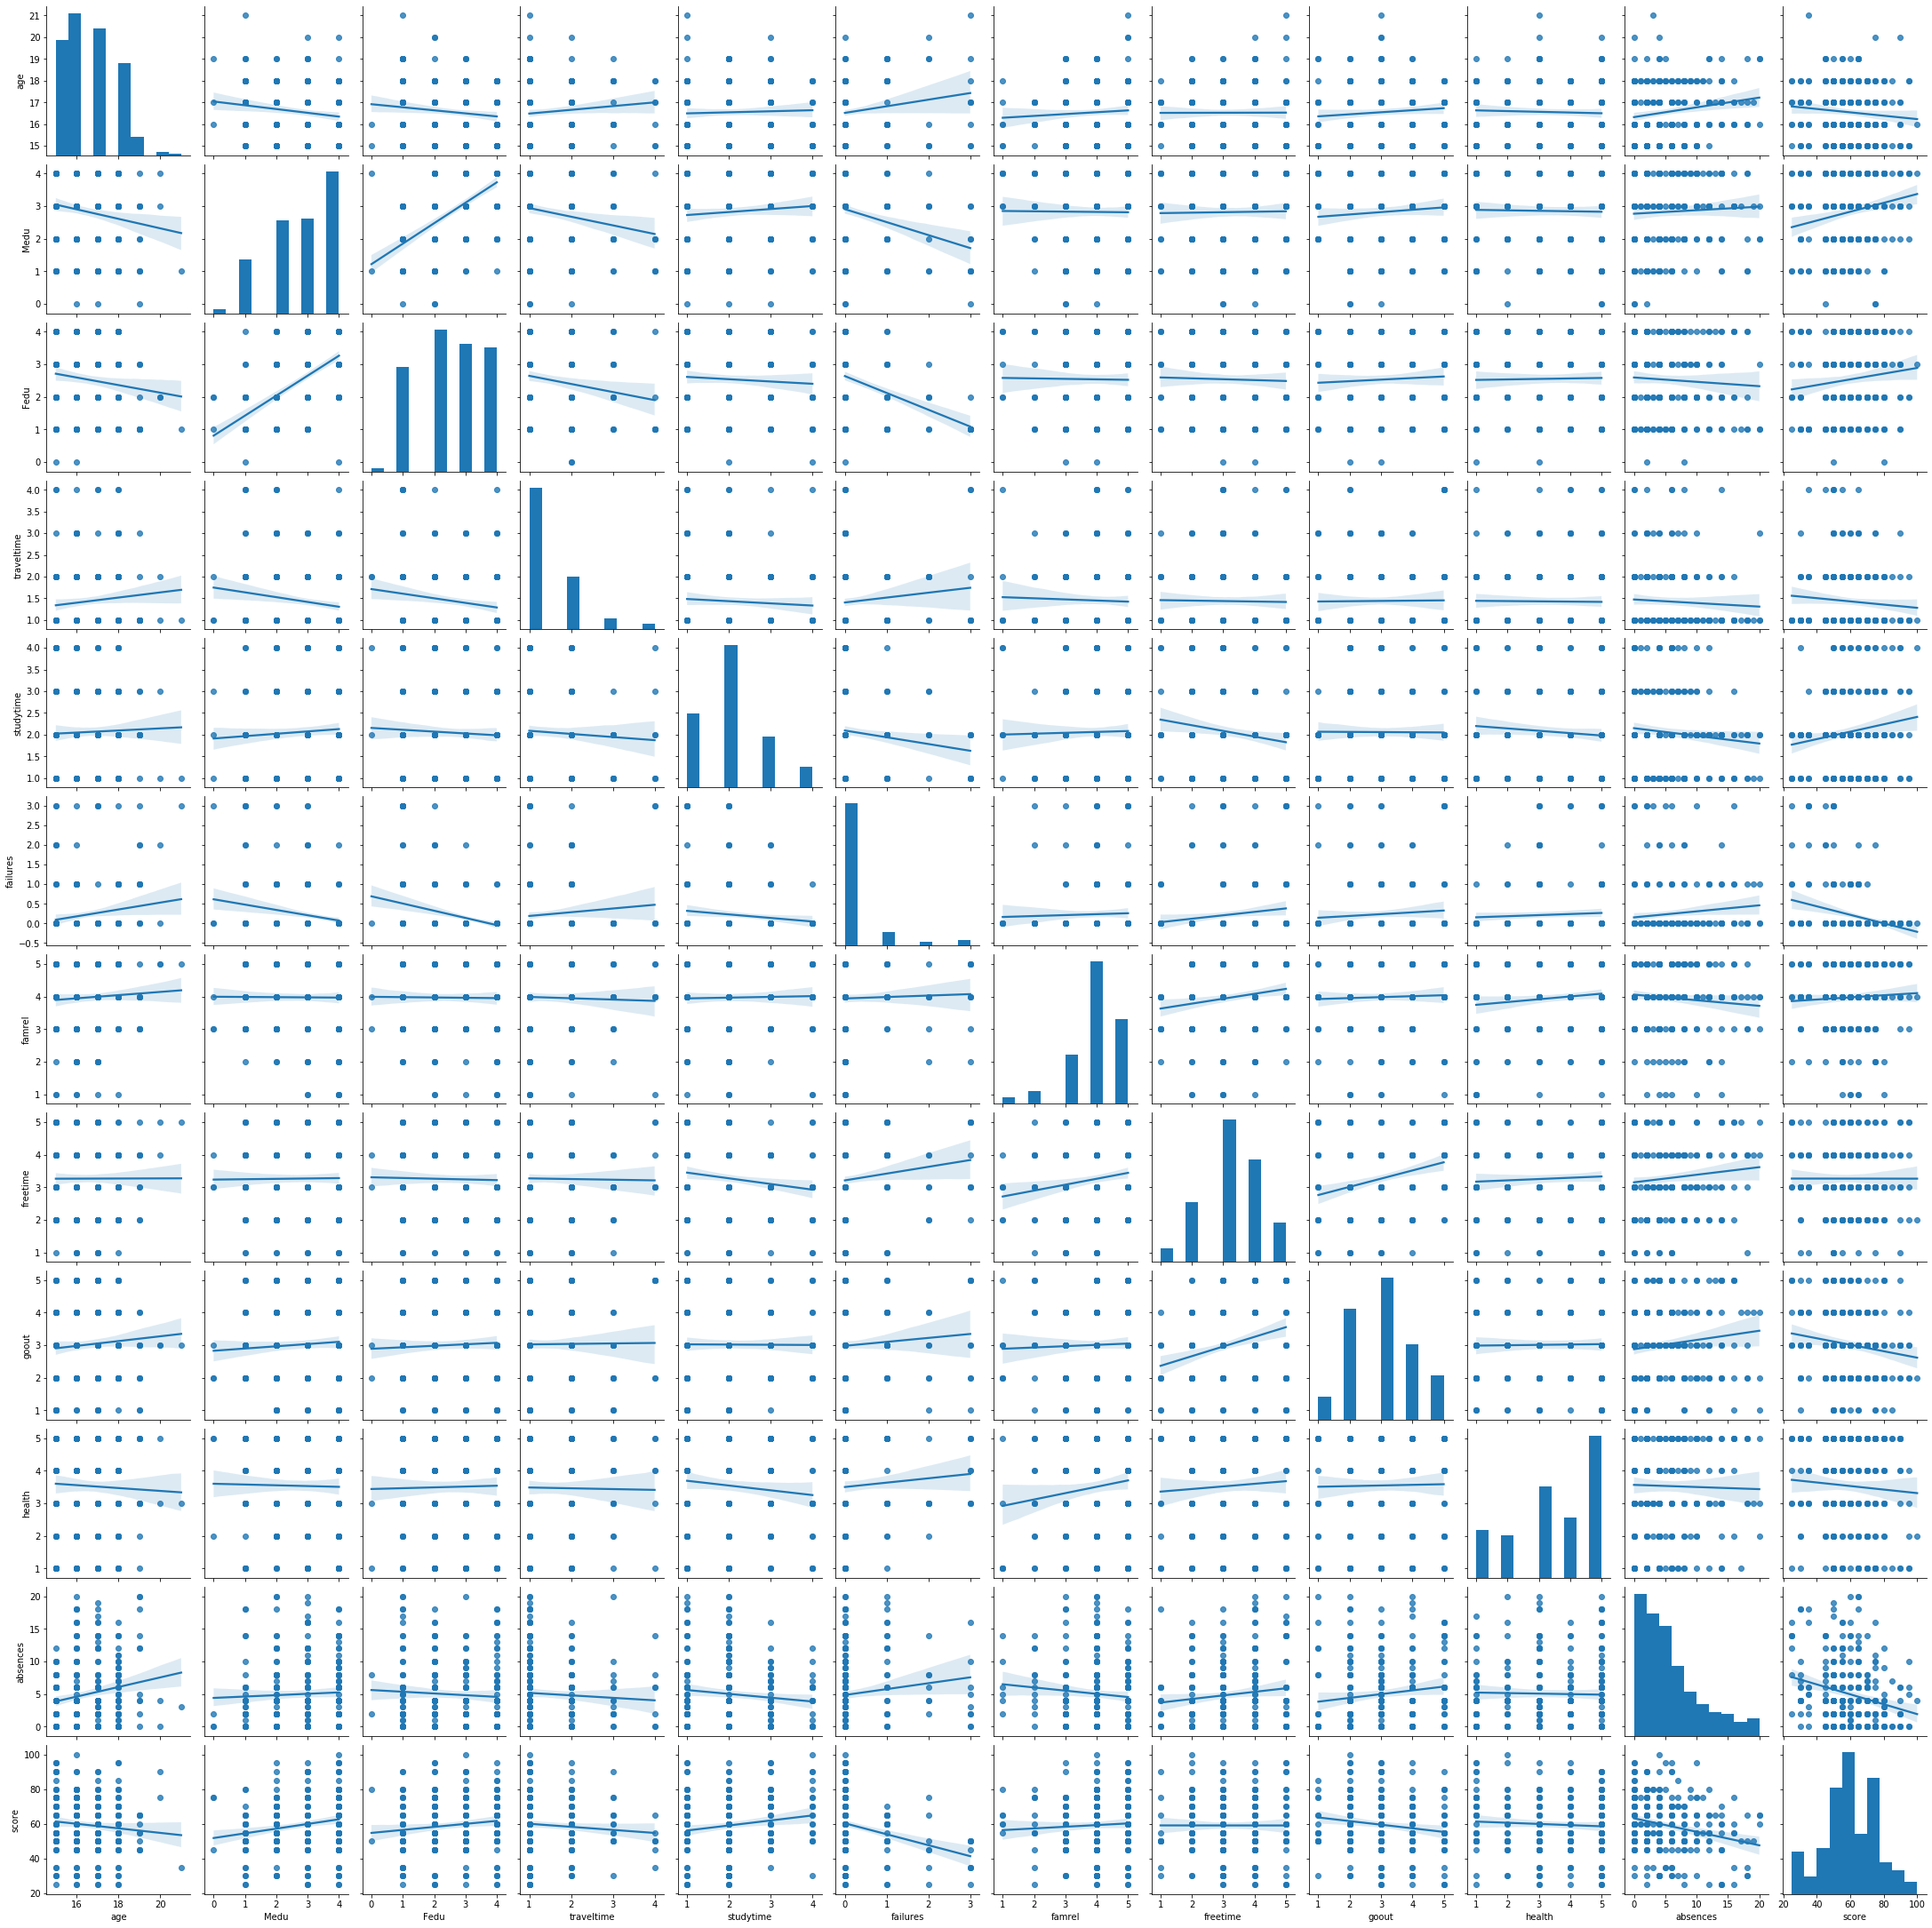

In [56]:
# построим графики зависимости переменных
sns.pairplot(new_stud_math.astype(float), kind = 'reg')

In [57]:
# рассмотрим матрицу корреляций
new_stud_math.astype(float).corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.159274,-0.128056,0.100914,0.034167,0.163423,0.064661,0.002309,0.083167,-0.038293,0.181972,-0.100893
Medu,-0.159274,1.000000,0.620735,-0.171392,0.070685,-0.232519,-0.008145,0.012689,0.070348,-0.018436,0.047790,0.191362
Fedu,-0.128056,0.620735,1.000000,-0.162130,-0.054606,-0.308142,-0.012089,-0.024356,0.047010,0.019425,-0.059207,0.123375
traveltime,0.100914,-0.171392,-0.162130,1.000000,-0.060154,0.103607,-0.032247,-0.014728,0.009764,-0.012239,-0.055873,-0.080779
studytime,0.034167,0.070685,-0.054606,-0.060154,1.000000,-0.118710,0.021734,-0.150661,-0.005145,-0.089167,-0.101769,0.156829
failures,0.163423,-0.232519,-0.308142,0.103607,-0.118710,1.000000,0.032550,0.135139,0.074706,0.060760,0.118026,-0.261543
famrel,0.064661,-0.008145,-0.012089,-0.032247,0.021734,0.032550,1.000000,0.165674,0.034351,0.129311,-0.091886,0.056158
freetime,0.002309,0.012689,-0.024356,-0.014728,-0.150661,0.135139,0.165674,1.000000,0.272982,0.056456,0.113029,-0.000606
goout,0.083167,0.070348,0.047010,0.009764,-0.005145,0.074706,0.034351,0.272982,1.000000,0.014859,0.127784,-0.143562
health,-0.038293,-0.018436,0.019425,-0.012239,-0.089167,0.060760,0.129311,0.056456,0.014859,1.000000,-0.022890,-0.060839


In [58]:
# Выводы по графикам зависимости переменных и матрице корреляций:
#    все переменные слабокоррелированы между собой.    

In [59]:
# рассмотрим номинативные переменные 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob'
#               , 'reason', 'guardian', 'schoolsup', 'famsup'
#               , 'paid', 'activities', 'nursery', 'higher', 'internet'
#               , 'romantic'

In [60]:
# функция проверки нулевой гипотезы, что распределения 'score' по различным параметрам неразличимы
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [61]:
# проверим нудевую гипотезу, что распределение 'score' по различным параметрам неразличимы, 
# для номинативных переменных
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob'
               , 'reason', 'guardian', 'schoolsup', 'famsup'
               , 'paid', 'activities', 'nursery', 'higher', 'internet'
               , 'romantic']:
    get_stat_dif(col)

In [62]:
# в результате провеки нулевой гипотезы, мы не смогли ее опровергнуть
# таким образом в датасете для построения модели останутся только числовые переменные

In [63]:
stud_math_for_model = stud_math.loc[:, ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures'
                                        , 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']]
stud_math_for_model.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
0,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
